Homework 5 Question 3 
Malcolm Taylor, Karen Pardo, Kulin Chheda 

# Question 1:
Write explicitly the losses $L_{t+\Delta}$ in terms of quantities known at time t and the random variables $X_{t+\Delta} , s_{t+\Delta}$ 

$$L_{t+\Delta} = -\Delta_t (S^b_{t+\Delta} - S_{t}) $$ 

where 

$$ \frac {1} {2} s_{t+\Delta} = \frac {S_{t+\Delta} - S^b_{t+\Delta}} {S_{t+\Delta}}  $$

$$ S^b_{t+\Delta} = - \frac {1} {2} s_{t+\Delta} * S_{t+\Delta} + S_{t+\Delta} $$

$$ S^b_{t+\Delta} = - S_{t+\Delta} (\frac {1} {2} s_{t+\Delta} + 1) $$

and 

$$ S_{t+\Delta} = S_t * e^{X_{t+\Delta}} $$

so 

$$ S^b_{t+\Delta} = -S_t * e^{X_{t+\Delta}}*(\frac {1} {2} s_{t+\Delta} + 1) $$



The Losses can then be calculated using:: 

$$ L_{t+\Delta} = -\Delta_t [S_t * e^{X_{t+\Delta}}*(\frac {1} {2} s_{t+\Delta} + 1) - S_t * e^{X_{t+\Delta}} ] $$

$$ L_{t+\Delta} = -\Delta_t * S_t * e^{X_{t+\Delta}} [ (\frac {1} {2} s_{t+\Delta}+1) - 1] $$

$$ L_{t+\Delta} = -\Delta_t * S_t * e^{X_{t+\Delta}} * \frac {1} {2} s_{t+\Delta} $$

# Question 2 

$$LVAR_\alpha^{ind} = VaR_\alpha + LC$$

$$ LC = 1/2 \Delta_t S_t(\mu_{s,t+\Delta} + k\sigma_{s,t+\Delta})$$

The LC cost can be computed using k = 3, $ \mu_{s,t+\Delta} = 0.2 $ , $ \sigma_{s,t+\Delta} = 0.08, S_t = 59, \Delta_t = 100$,  

In [1]:
k = 3
mu_s = 0.002
sigma_s = 0.0008
St = 59 
delta_t = 100 

LC = 0.5*delta_t*St*(mu_s+k*sigma_s)
LC

12.98

$$ VaR_{\alpha} = \Delta_t S_t (1-e^{\mu_{t+\Delta} +\sigma_{t+\Delta}N^{-1}(1-\alpha)}) $$
$$Z_{1-\alpha} = Z_{0.01} = -2.326348 $$


In [2]:
import math
mu_t = 0 
sigma_t = 0.4/math.sqrt(250)
Z_alpha = -2.3263
VaR = St*delta_t*(1-math.exp(mu_t + sigma_t*Z_alpha))
VaR

337.202669461597

In [3]:
LVar_ind_alpha = VaR+LC
LVar_ind_alpha

350.182669461597

# Question 3: 
Simulation 

Start my importing packages and setting plot parameters 

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Specify Parameters for graphs 
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55



Create function to sample s and X from normal distributions with the respective mean and standard deviation 
Next we calculate the loss using the formula from part 1

We draw X and s from their respective normal distributions and then use the equation 
$$ L_{t+\Delta} = -\Delta_t * S_t * e^{X_{t+\Delta}} [ \frac {1} {2} s_{t+\Delta}] $$


In [5]:
def Lossfunction(mu_s, mu_t, sigma_s, sigma_t, St, delta_t):
    s_sample = np.random.normal(loc = mu_s, scale = sigma_s)
    X_sample = np.random.normal(loc = mu_t, scale= sigma_t)
    Loss = delta_t * St * np.exp(X_sample)*(0.5*s_sample)
    return(Loss)

In [6]:
s_sample = np.random.normal(loc = mu_s, scale = sigma_s)
X_sample = np.random.normal(loc = mu_t, scale= sigma_t)
Loss = delta_t * St * np.exp(X_sample)*(0.5*s_sample)
print(s_sample, X_sample)
Loss


0.0018411905963245103 0.018215565172591704


5.5313569274847314


Pre allocate space and then simulate returns 100000 (numb_sim) times 

In [7]:
numb_sim = 100000 # M 
LVAR_sim = pd.Series(data = np.repeat(0,numb_sim))
for sim in range(numb_sim):
    LVAR_sim.loc[sim] = Lossfunction(mu_s, mu_t, sigma_s, sigma_t, St, delta_t)
LVAR_sim.describe()

count    100000.000000
mean          5.900997
std           2.367700
min          -5.387702
25%           4.301821
50%           5.895013
75%           7.483499
max          15.922148
dtype: float64

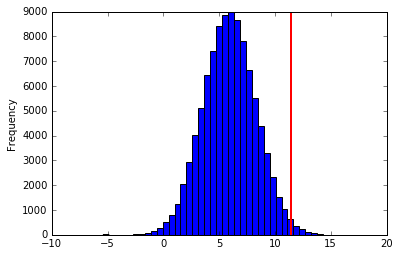

In [8]:
LVAR_sim.plot(kind = 'hist', bins = 40)
quantile99 = LVAR_sim.quantile(q=0.99)
plt.axvline(x = quantile99, color = 'r', linewidth = 2.0)

### Part 1 ###
The confidence $\alpha$

*Not really sure what this means....*

### Part 2 ###

The estimate of $LVAR_{\alpha}^{sim}$ found via simulation 

In [9]:
LVAR_99 = LVAR_sim.quantile(q=0.99)
LVAR_99

11.469697751928559

### Part 3 ### 

The theoretical $VaR_{\alpha} $ from question 2

In [10]:
import math
mu_t = 0 
sigma_t = 0.4/math.sqrt(250)
Z_alpha = -2.3263
VaR = St*delta_t*(1-math.exp(mu_t + sigma_t*Z_alpha))
VaR

337.202669461597

### Part 4 ###

The estimated liquidity cost $LC^{sim} = LVAR_{\alpha}^{sim} - VaR_{\alpha}$ 


In [11]:
LC_sim = LVAR_99 - VaR
LC_sim

-325.73297170966845

### Part 5 ### 
The estimated percentage increase in the risk measure: 
$$ 100*(\frac{LVAR^{sim}_{\alpha}} {VaR_{\alpha}} - 1) $$

In [12]:
100*(LVAR_99/VaR -1)

-96.598574450717749

### Part 6 ## 

The industry approximate $LVAR^{ind}_{\alpha} $ 

In [13]:
LVar_ind_alpha

350.182669461597

### Part 7 ###
The industry liquidity cost LC 


In [14]:
LC

12.98

### Part 8 ## 
The industry percentage increase in the risk measure: $ 100 \frac{LC} {VaR_{\alpha}} $

In [15]:
100*(LC/VaR)

3.8493170948868345

How do the risk measures and liquidity costs compare? 

*Not sure...* 